# MODELWRAPPER EXAMPLE
The ModelWrapper just provides some convenience methods to use our Keras model easily. This example is only meant to provide a better understanding on how the ModelWrapper works.

### Import the ModelWrapper, the DataGenerator and auxiliary libraries

In [1]:
from modelwrapper import ModelWrapper
from datagenerator import DataGenerator
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Create train, test and validation data generators
Note that the trainGenerator is in randomized mode to reduce overfitting, whilst validation and test generators are not, since randominzation has no influence in this case and non-randomized access to data is faster.
Also note that each generator uses only one informative image since each transectList has a single item. A proper usage of the ModelWrapper requires more training, validation and test data.

In [2]:
trainGenerator=DataGenerator('DATASET/DATA','DATASET/GT',transectList=[6],doRandomize=True)
testGenerator=DataGenerator('DATASET/DATA','DATASET/GT',transectList=[7],doRandomize=False)
valGenerator=DataGenerator('DATASET/DATA','DATASET/GT',transectList=[8],doRandomize=False)

### Create the model
Note that calling to create() is necessary to actually create the model. Also note that the created model is the one described in the reference paper.

In [3]:
theModel=ModelWrapper()
theModel.create()

Instructions for updating:
Colocations handled automatically by placer.


### Train the model
The first two parameters are the training and the validation data generators. The third one is the number of epochs.

In [4]:
theModel.train(trainGenerator,valGenerator,100)

Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Epoch 1/100
9/9 [==============================] - 2s 170ms/step - loss: 1.0923 - acc: 0.5380 - val_loss: 1.0791 - val_acc: 0.7208
Epoch 2/100
9/9 [==============================] - 1s 121ms/step - loss: 1.0703 - acc: 0.6494 - val_loss: 1.0319 - val_acc: 0.7391
Epoch 3/100
9/9 [==============================] - 1s 123ms/step - loss: 1.0074 - acc: 0.7152 - val_loss: 0.9500 - val_acc: 0.6808
Epoch 4/100
9/9 [==============================] - 1s 130ms/step - loss: 0.9311 - acc: 0.6902 - val_loss: 0.8387 - val_acc: 0.7650
Epoch 5/100
9/9 [==============================] - 1s 123ms/step - loss: 0.8789 - acc: 0.6855 - val_loss: 0.7438 - val_acc: 0.7487
Epoch 6/100
9/9 [==============================] - 1s 120ms/step - loss: 0.7898 - acc: 0.7543 - val_loss: 0.6522 - val_acc: 0.7943
Epoch 7/100
9/9 [==============================] - 1s 125ms/step - loss: 0.6609 - acc: 0

9/9 [==============================] - 1s 121ms/step - loss: 0.1877 - acc: 0.9289 - val_loss: 0.2693 - val_acc: 0.9044
Epoch 60/100
9/9 [==============================] - 1s 120ms/step - loss: 0.1952 - acc: 0.9267 - val_loss: 0.2575 - val_acc: 0.9093
Epoch 61/100
9/9 [==============================] - 1s 120ms/step - loss: 0.2027 - acc: 0.9256 - val_loss: 0.2895 - val_acc: 0.8916
Epoch 62/100
9/9 [==============================] - 1s 119ms/step - loss: 0.1850 - acc: 0.9289 - val_loss: 0.2830 - val_acc: 0.8969
Epoch 63/100
9/9 [==============================] - 1s 121ms/step - loss: 0.1942 - acc: 0.9269 - val_loss: 0.2955 - val_acc: 0.8876
Epoch 64/100
9/9 [==============================] - 1s 119ms/step - loss: 0.1880 - acc: 0.9273 - val_loss: 0.2694 - val_acc: 0.9008
Epoch 65/100
9/9 [==============================] - 1s 119ms/step - loss: 0.2027 - acc: 0.9220 - val_loss: 0.2559 - val_acc: 0.9080
Epoch 66/100
9/9 [==============================] - 1s 122ms/step - loss: 0.1943 - acc: 0

### Save the model to disk

In [5]:
theModel.save('MODELS/TEST_MODEL')

### Plot the training history
These plots are useful to detect overfitting and decide the number of epochs.
It can be observed that accuracies reach quite large values, even with such small training set.

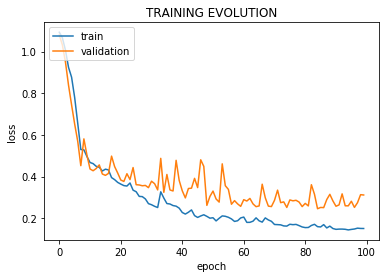

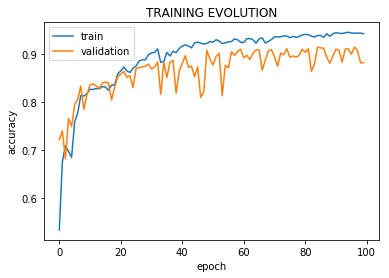

In [6]:
theModel.plot_training_history()

### Load the model and plot the history again
Just to show that save/load preserves the history (and, of course, the model itself).

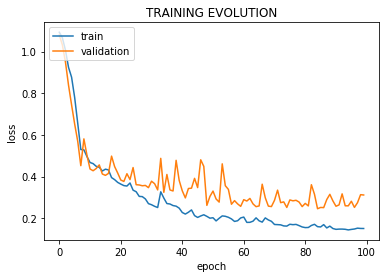

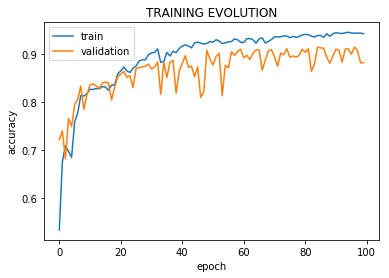

In [7]:
theModel.load('MODELS/TEST_MODEL')
theModel.plot_training_history()

### Evaluate the model
This evaluation is performed by Keras itself. Other evaluation methods, such as those described in the reference paper, are preferred.
Note that theModel.theModel is the Keras model and, so, metrics_name is a Keras attribute. The evaluation output can be changed as in other Keras models.

In [8]:
theNames=theModel.theModel.metrics_names
theMetrics=theModel.evaluate(testGenerator)

### Print the evaluation
Note that accuracy is quite good, taking into account the small training set.

In [9]:
for i in range(len(theNames)):
    print('* %s : %.2f' % (theNames[i],theMetrics[i]))

* loss : 0.53
* acc : 0.82


### Get one batch of images and segment it
To obtain the batch, the testGenerator is used. It provides the data and the ground truth. Then, the predict method is used to obtain the segmented patches.

In [10]:
theImages,theGT=testGenerator.__getitem__(0)
thePrediction=theModel.predict(theImages)

### Plot the segmented data
First row contains the original SSS patches. Second row is the ground truth. Third row contains the segmented paches.
Note that this is multi-class output. Since there are three classes, the output is plotted as an RGB images. The blurry regions are areas where the probabilities of two classes are similar. See the reference paper for more information.
Note that segmentation is far from perfect (though not bad at all) due to the extremely small training set.

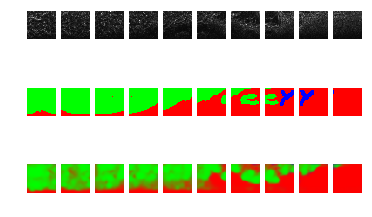

In [11]:
plt.figure()
for i in range(theImages.shape[0]):
    plt.subplot(3,theImages.shape[0],i+1)
    plt.imshow(theImages[i,:,:,0],cmap='gray',vmin=0,vmax=1)
    plt.axis('off')
    plt.subplot(3,theImages.shape[0],theImages.shape[0]+i+1)
    plt.imshow(theGT[i])
    plt.axis('off')
    plt.subplot(3,theImages.shape[0],2*theImages.shape[0]+i+1)
    plt.imshow(thePrediction[i])
    plt.axis('off')